## Convolutional Neural Network

In [18]:
# Import modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Softmax, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [19]:
# Import data
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    # convert labels to categorical samples
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
    return ((x_train, y_train), (x_test, y_test))

(x_train, y_train), (x_test, y_test) = load_data()

# Reshape data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

We print a few of the images. The dataset we are working with contains images of the ten categories listed below.

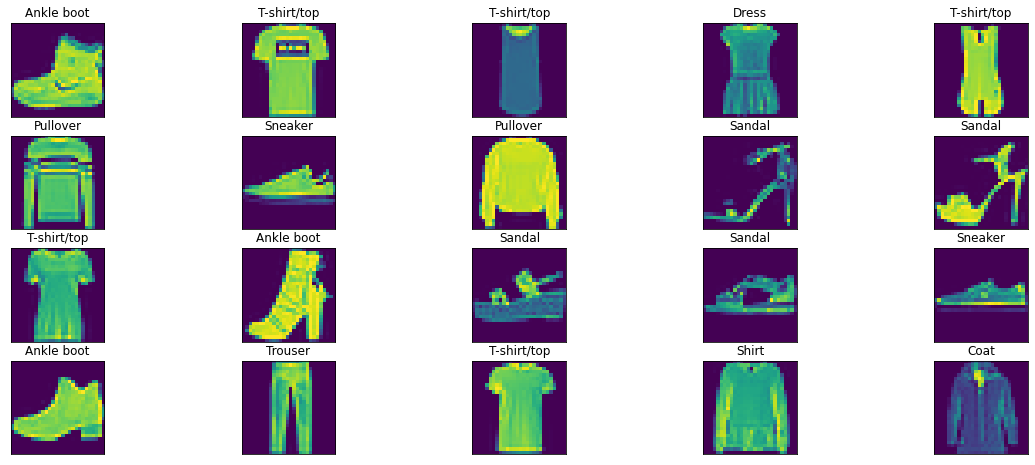

In [20]:
# The 10 categories
categories = ["T-shirt/top",
              "Trouser", 
              "Pullover", 
              "Dress", 
              "Coat", 
              "Sandal", 
              "Shirt", 
              "Sneaker", 
              "Bag", 
              "Ankle boot"]

# Plot the first 20 images with their labels
plt.figure(figsize = (20, 10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.title(categories[np.argmax(y_train[i])])
    plt.xticks([])
    plt.yticks([])

Now we create a class that takes as an input the number of epochs we are going to have and the learning rate for the stochastic gradient descent. The architecture of our network is going to be the following:



*   Input layer of shape $(28, 28, 1)$,
*   Convolutional layer applying $ 3 \times 3$ filters with $8$ feature maps,
*   Convolutional layer applying $ 3 \times 3$ filters with $8$ feature maps,
*   Convolutional layer applying $ 3 \times 3$ filters with $16$ feature maps,
*   Convolutional layer applying $ 3 \times 3$ filters with $16$ feature maps,
*   Maximum pooling layer $2\times 2$,
*   Fully connected layer with $64$ neurons,
*   Output layer with $10$ neurons.

As an activation function between all layers we use Leaky ReLu with a slope of $0.01$ and the softmax function is the activation function on the output layer. The optimisation method is stochastic gradient descent (SGD), and the loss function is (categorical) cross-entropy.

In [21]:
class CNN():

  def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate

  # Construct the neural network as described above
  def network(self):

    model = Sequential([
                        # 1st convolutional layer with Leaky ReLu
                        Conv2D(filters=8, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                        LeakyReLU(alpha=0.01),

                        # 2nd convolutional layer with Leaky ReLu
                        Conv2D(filters=8, kernel_size=(3, 3)),
                        LeakyReLU(alpha=0.01),
                          
                        # 3rd convolutional layer with Leaky ReLu
                        Conv2D(filters=16, kernel_size=(3, 3)),
                        LeakyReLU(alpha=0.01),

                        # 4th convolutional layer with Leaky ReLu
                        Conv2D(filters=16, kernel_size=(3, 3)),
                        LeakyReLU(alpha=0.01),

                        # Max pooling after 4th layer
                        MaxPooling2D(pool_size=(2,2)),

                        # Flatten to get the dense layer with 64 neurons
                        Flatten(),
                        Dense(units=64),
                        LeakyReLU(alpha=0.01),

                        # Output layer with 10 neurons
                        Dense(10),
                        Softmax()
                        ])

    # Compile the model using Stochastic Gradient Descent as optimiser,
    # categorical crossentropy as loss function and
    # accuracy as the metric
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate=self.learning_rate),
                  metrics=['accuracy'])

    return model
    
  # Train the model
  def train(self, x_train, y_train, x_test, y_test, batch_size=256):
    '''
    Input:
      x_train: training data (images)
      y_train: labels for the training images
      x_test: testing data
      y_test: testing_labels
    Output:
      Fitted module constructed by the network above
    '''

    model = self.network()
    fitted_model = model.fit(x_train,
                             y_train, 
                             batch_size=batch_size, 
                             epochs=self.epochs, 
                             validation_data=(x_test, y_test))
    
    self.model = model
    
    return fitted_model

Now that we have constructed our model, we first show a summary of the network:

In [22]:
# Define the convolutional neural network with 40 epochs and 0.001 learning rate
cnn=CNN(epochs=40, learning_rate=0.001)

# Print a summary of the model
model = cnn.network()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 26, 26, 8)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 24, 24, 8)         0         
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 16)        1168      
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 22, 22, 16)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 16)       

We can see the output shape after each layer and we can double-check that everything is as it should be. For example, for the first convolutional layer the output shape is $(26, 26, 8)$ because we are using a $3 \times 3$ kernel on the initial input with shape $(28, 28, 1)$ and the $8$ is because that is the number of featre maps we require. The final output has $10$ neuron as expected.

Now we train the model on the entire dataset.

In [23]:
# Train the model
fitted_model = cnn.train(x_train, 
                         y_train, 
                         x_test, 
                         y_test, 
                         batch_size=256)

Epoch 1/40
235/235 [==============================] - 24s 101ms/step - loss: 2.3016 - accuracy: 0.1272 - val_loss: 2.2984 - val_accuracy: 0.1312
Epoch 2/40
235/235 [==============================] - 24s 104ms/step - loss: 2.2963 - accuracy: 0.1412 - val_loss: 2.2945 - val_accuracy: 0.1490
Epoch 3/40
235/235 [==============================] - 25s 107ms/step - loss: 2.2927 - accuracy: 0.1568 - val_loss: 2.2909 - val_accuracy: 0.1619
Epoch 4/40
235/235 [==============================] - 24s 101ms/step - loss: 2.2889 - accuracy: 0.1710 - val_loss: 2.2869 - val_accuracy: 0.1820
Epoch 5/40
235/235 [==============================] - 25s 107ms/step - loss: 2.2840 - accuracy: 0.1980 - val_loss: 2.2809 - val_accuracy: 0.2106
Epoch 6/40
235/235 [==============================] - 26s 109ms/step - loss: 2.2769 - accuracy: 0.2264 - val_loss: 2.2726 - val_accuracy: 0.2365
Epoch 7/40
235/235 [==============================] - 26s 110ms/step - loss: 2.2662 - accuracy: 0.2438 - val_loss: 2.2587 - val_ac

As we can see, by the $40$th epoch we get an accuracy on the validation set of around $0.80$ indicating that our model performs well. For a better view on the matter we will plot the loss function and the accuracy of the model as a function of the number of epochs for both the training and validation sets.

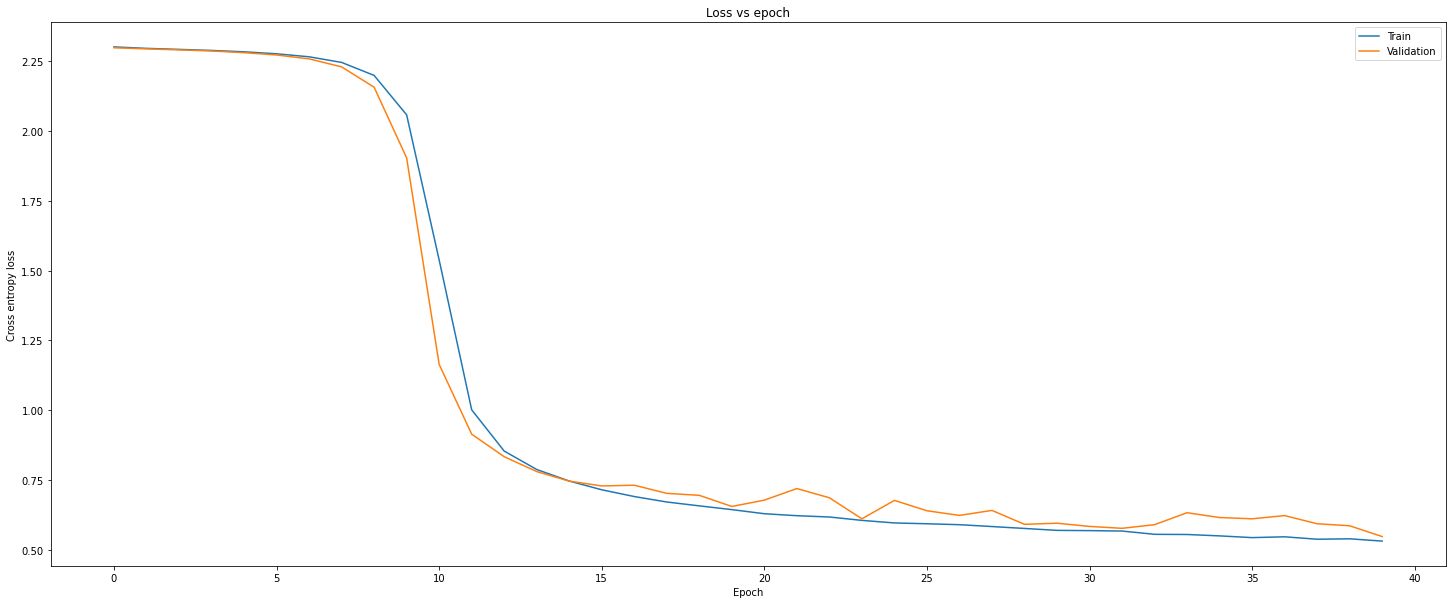

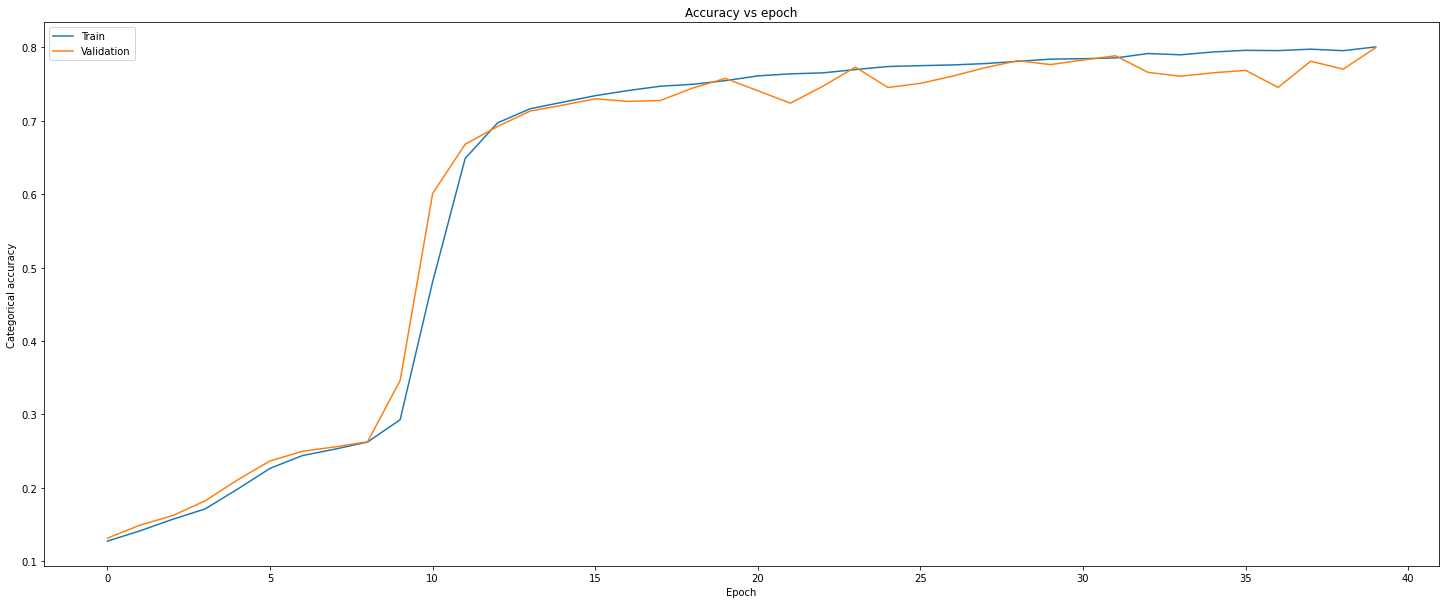

In [24]:
# Plot of the loss function
plt.figure(figsize=(25,10))
plt.plot(fitted_model.history['loss'], label='Train')
plt.plot(fitted_model.history['val_loss'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.title("Loss vs epoch")
plt.legend()

# Plot of the accuracy
plt.figure(figsize=(25,10))
plt.plot(fitted_model.history['accuracy'], label='Train')
plt.plot(fitted_model.history['val_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")
plt.title("Accuracy vs epoch")
plt.legend()
plt.show()

From these plots we can see that initially (for the first few epochs) the performance of the model on the validation set is better than that on the training set, which indicates that there is no overfitting for the first half of the epochs. After the first few epochs however, the accuracy of thea validation set decreases and becomes less smooth, and the loss increases in a similar way.

Therefore, we can conclude that our model overfits eventually.

## Dropout layer

We now incorporate a dropout in the fully connected layer, which randomly zeroes-out neurons. First, we will describe the effects of the dropout, which are the following:

*   The capacity of the model is reduced, so it acts as a regularisation effect
*   Prevents the neurons to depend on other specific neurons to be present in the network, i.e. it reduces the co-adapting in the neurons and this way the model generalises better
*   The model is able to detect specific features that are less noisy (i.e. it recognises edges, textures better).

To determine the optimal dropout probability rate, we split the training set into training and validation sets ($80\%$ and $20\%)$ and scan over the range $[0.1, 0.9]$ in steps of $0.1$ using accuracy of the validation set as a measure of performance. 

In [25]:
class CNN_dropout():

  def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
  
  # Construct neural network given a dropout rate
  def network(self, dropout_rate):

    model = Sequential([
                        # 1st convolutional layer with Leaky ReLu
                        Conv2D(filters=8, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                        LeakyReLU(alpha=0.01),

                        # 2nd convolutional layer with Leaky ReLu
                        Conv2D(filters=8, kernel_size=(3, 3)),
                        LeakyReLU(alpha=0.01),
                          
                        # 3rd convolutional layer with Leaky ReLu
                        Conv2D(filters=16, kernel_size=(3, 3)),
                        LeakyReLU(alpha=0.01),

                        # 4th convolutional layer with Leaky ReLu
                        Conv2D(filters=16, kernel_size=(3, 3)),
                        LeakyReLU(alpha=0.01),

                        # Max pooling after 4th layer
                        MaxPooling2D(pool_size=(2,2)),

                        # Flatten to get the dense layer with 64 neurons
                        Flatten(),
                        Dense(units=64),
                        LeakyReLU(alpha=0.01),
                        # Incorporate Dropout on the fully connected layer
                        Dropout(rate=dropout_rate), 
                                           

                        # Output layer with 10 neurons
                        Dense(10),
                        Softmax()
                        ])

    # Compile the model using SGD as before
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate=self.learning_rate),
                  metrics=['accuracy'])
  
    return model
  

  def train(self, x_train, y_train, x_test, y_test, dropout_rate, batch_size=256, v=0):
    '''
    Input:
      x_train: training data (images)
      y_train: labels for the training images
      x_test: testing data
      y_test: testing_labels
      dropout_rate: probability for the dropout on the fully connected layer
      v: 0 if we do not want to print results for each epoch
    Output:
      Fitted module constructed by the network above
    '''

    model = self.network(dropout_rate)
    fitted_model = model.fit(x_train,
                             y_train, 
                             batch_size=batch_size, 
                             epochs=self.epochs, 
                             validation_data=(x_test, y_test),
                             verbose=v)  # Not printing accuracies and losses for each epoch

    self.model = model
    
    return fitted_model
  
  def choose_best_rate(self, x_train, y_train, dropout_rate_range, batch_size=256):
    '''
    Input:
      x_train: training data (images)
      y_train: labels for the training images
      dropout_rate_range: range for the probability of dropout
    Output:
      Returns the optimal dropout rate from the specified range
    '''

    # Split data into 80/20 training and validation sets
    p = np.random.permutation(len(x_train))
    x_train = x_train[p]
    y_train = y_train[p]
    training_x = x_train[: int(0.8 * len(x_train))]
    training_y = y_train[: int(0.8 * len(y_train))]
    validation_x = x_train[int(0.8 * len(x_train)) :]
    validation_y = y_train[int(0.8 * len(y_train)) :]


    # Record accuracies for each dropout rate
    accuracies = []
    
    # Fit the model for each dropout rate in the range
    for dropout_rate in dropout_rate_range:
      fitted_model = self.train(training_x, 
                                training_y, 
                                validation_x, 
                                validation_y, 
                                dropout_rate, 
                                batch_size=batch_size)
      
      # Append the accuracy on the validation set on the 40th epoch
      accuracies.append(fitted_model.history["val_accuracy"][-1])

    # Return the dropout rate with highest accuracy on the validation set
    # and the accuracies for each dropout rate
    return dropout_rate_range[np.argmax(accuracies)], accuracies

Now we construct the convolutional neural network with dropout on the fully connected layer with 40 epochs and learning rate of 0.001. We then perform the search for optimal dropout rate.

In [26]:
# Constuct the network
cnn_dropout = CNN_dropout(epochs=40, learning_rate=0.001)

# Define range for the dropout rate
dropout_rate_range = np.linspace(0.1, 0.9, 9)

# Compute optimal dropout rate and accuracies
optimal_dropout_rate, accuracies = cnn_dropout.choose_best_rate(x_train, 
                                                                y_train, 
                                                                dropout_rate_range)

In [27]:
# Print optimal rate and its accuracy
print("Optimal dropout rate is: ", optimal_dropout_rate)
print("Accuracy for the optimal dropout rate is: ", np.max(accuracies))

Optimal dropout rate is:  0.2
Accuracy for the optimal dropout rate is:  0.8069999814033508


For visual input, we plot the accuracy on the validation set after $40$ epochs for each of the dropout rate.

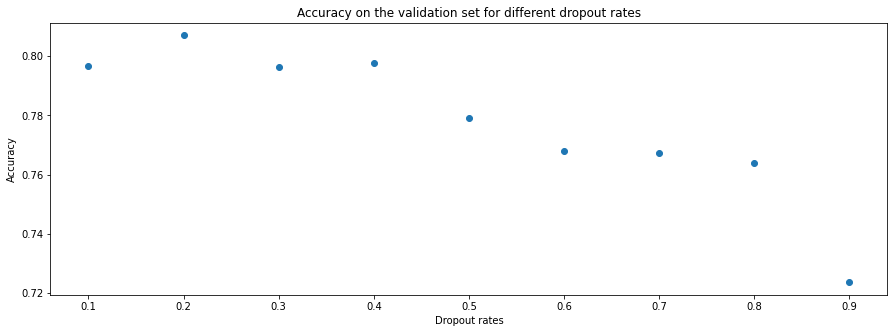

In [28]:
# Plot accuracies for each dropout rate
plt.figure(figsize = (15, 5))
plt.scatter(dropout_rate_range, accuracies)
plt.title('Accuracy on the validation set for different dropout rates')
plt.xlabel('Dropout rates')
plt.ylabel('Accuracy')
plt.show()

While we found the optimal value to be $0.1$, we can see that the accuracy for the small values ($0.1 - 0.4$) of the dropout rate are quite similar, whereas the accuracy for higher rates close to $1$ are much lower. So while we will stick with the optimal rate produced, due to the randomness in the model, if we run this again we could produce another optimal rate (which shouldn't be very close to one).

Now we fix the optimal dropout rate and print the summary of the model.

In [29]:
# Print a summary of the model
model = cnn_dropout.network(optimal_dropout_rate)
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 leaky_re_lu_80 (LeakyReLU)  (None, 26, 26, 8)         0         
                                                                 
 conv2d_65 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 leaky_re_lu_81 (LeakyReLU)  (None, 24, 24, 8)         0         
                                                                 
 conv2d_66 (Conv2D)          (None, 22, 22, 16)        1168      
                                                                 
 leaky_re_lu_82 (LeakyReLU)  (None, 22, 22, 16)        0         
                                                                 
 conv2d_67 (Conv2D)          (None, 20, 20, 16)      

In [30]:
# Train the model on entire training set using the optimal dropout rate
fitted_model = cnn_dropout.train(x_train, 
                                 y_train, 
                                 x_test, 
                                 y_test, 
                                 dropout_rate=optimal_dropout_rate,
                                 v=1)

Epoch 1/40
235/235 [==============================] - 21s 90ms/step - loss: 2.3059 - accuracy: 0.1355 - val_loss: 2.2957 - val_accuracy: 0.1998
Epoch 2/40
235/235 [==============================] - 21s 89ms/step - loss: 2.2873 - accuracy: 0.2073 - val_loss: 2.2777 - val_accuracy: 0.2976
Epoch 3/40
235/235 [==============================] - 21s 89ms/step - loss: 2.2636 - accuracy: 0.2873 - val_loss: 2.2445 - val_accuracy: 0.3969
Epoch 4/40
235/235 [==============================] - 22s 92ms/step - loss: 2.2075 - accuracy: 0.3559 - val_loss: 2.1482 - val_accuracy: 0.4528
Epoch 5/40
235/235 [==============================] - 21s 89ms/step - loss: 1.9845 - accuracy: 0.4415 - val_loss: 1.6594 - val_accuracy: 0.5150
Epoch 6/40
235/235 [==============================] - 21s 90ms/step - loss: 1.4332 - accuracy: 0.5276 - val_loss: 1.1374 - val_accuracy: 0.6254
Epoch 7/40
235/235 [==============================] - 21s 90ms/step - loss: 1.1629 - accuracy: 0.5939 - val_loss: 0.9677 - val_accuracy:

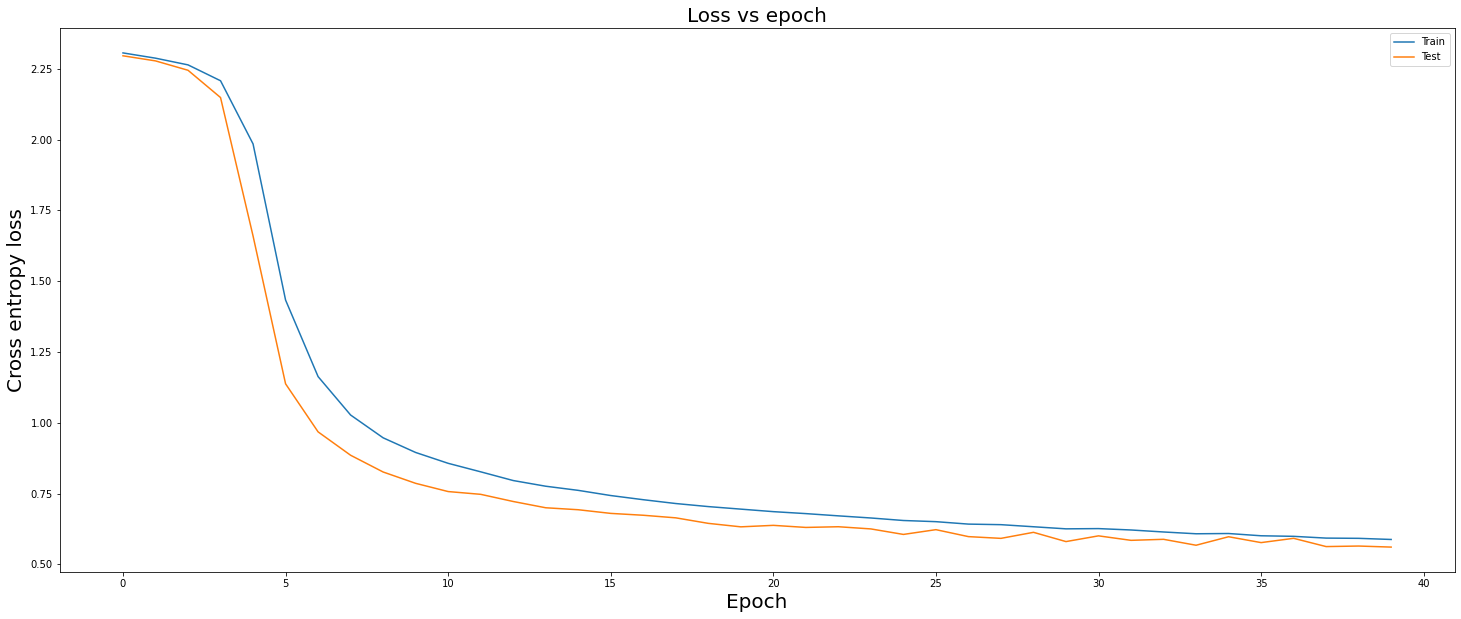

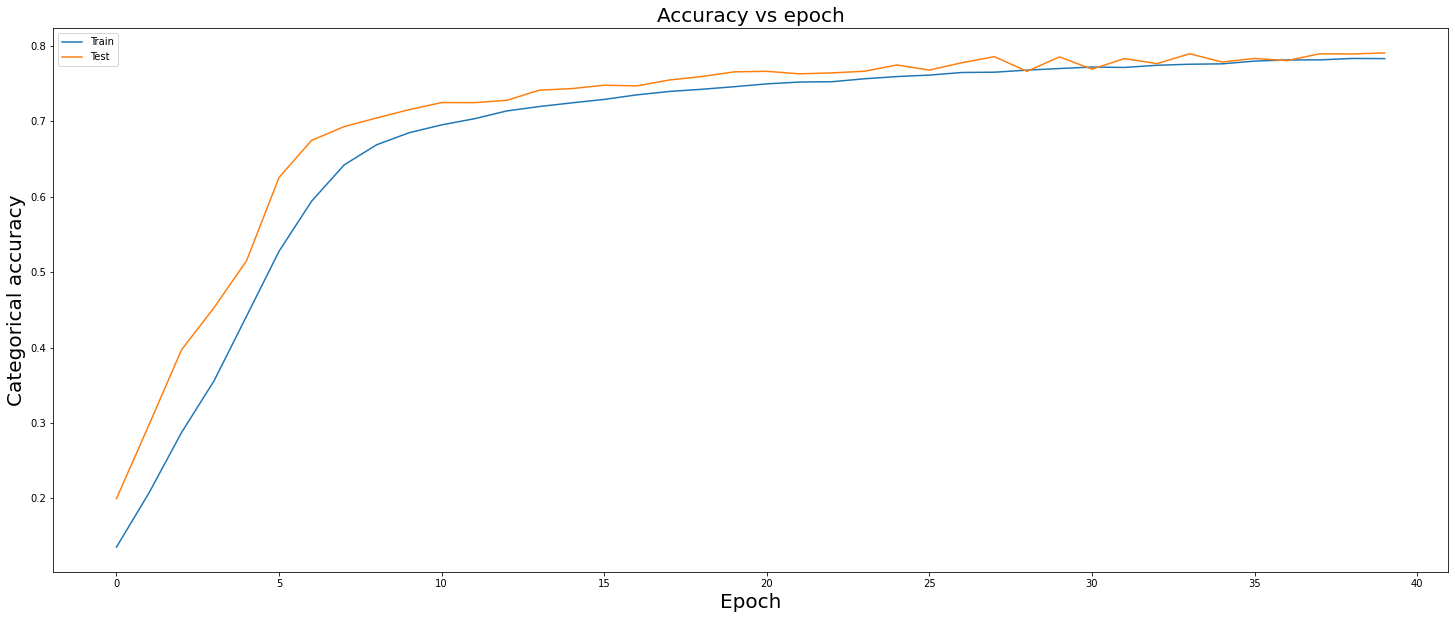

In [31]:
# Plot the learning curves
plt.figure(figsize=(25,10))
plt.plot(fitted_model.history['loss'], label='Train')
plt.plot(fitted_model.history['val_loss'], label='Test')
plt.xlabel("Epoch", size=20)
plt.ylabel("Cross entropy loss", size=20)
plt.title("Loss vs epoch", size=20)
plt.legend()

plt.figure(figsize=(25,10))
plt.plot(fitted_model.history['accuracy'], label='Train')
plt.plot(fitted_model.history['val_accuracy'], label='Test')
plt.xlabel("Epoch", size=20)
plt.ylabel("Categorical accuracy", size=20)
plt.title("Accuracy vs epoch", size=20)
plt.legend()
plt.show()

We can see that now the accuracy on the test set is higher than on the train set for most of the epochs and the two curves become very close as the number of epochs increases. We observe similar results for the loss. 

Comparting to the results on the CNN without dropout, we can see than there is no more overfitting after a certain epoch, suggesting that the dropout helped the model generalize better.